<a href="https://colab.research.google.com/github/ThanabordeeN/AI_mini_Project/blob/main/CNN_Binary_MulticlassFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os, shutil, pathlib,random
from keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
from keras import layers, models
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score
import keras

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir("/content/")
shutil.copyfile(src="/content/drive/MyDrive/dogcat.zip",
                dst="/content/dogcat.zip")


'/content/dogcat.zip'

In [ ]:
print(os.getcwd())

/content


In [ ]:
!unzip -qq dogcat.zip

In [ ]:
class_list=train_dataset = image_dataset_from_directory("/content/catdog/train/training_set")
print(class_list.class_names)

Found 8005 files belonging to 2 classes.
['cats', 'dogs']


In [ ]:
def remove_folder(path):
  if os.path.exists(path):
    shutil.rmtree(path)


In [ ]:
def RemoveSomeClass(classlist,keep,maindatafolder):
  for m in ["test","train","validation"]: # look into each folder
    for i in classlist.class_names: # list of all class
      if i not in keep: #delete other, keep these class
        remove_folder("%s/%s/%s"%(maindatafolder,m,i)) #call remove_folder function
        print("%s/%s/%s"%(maindatafolder,m,i)) #show remove_folder


In [ ]:
def Import_and_Resize(dataset_dir,image_size=180,batch_size=32,shuffle_set=False):
  class_list=train_dataset = image_dataset_from_directory(dataset_dir+"/train",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  validation_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  test_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  print("\nClass name list: %s" %class_list.class_names)
  return train_dataset,validation_dataset,test_dataset,class_list
  # return train_dataset,test_dataset,class_list


In [ ]:
def load_and_prep_image(filename, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img


Class: cats 
Pic name: cat.484.jpg


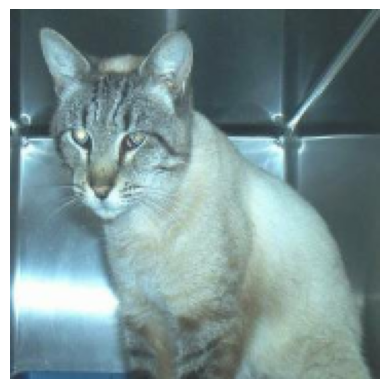

In [ ]:
# <<<< Run again and again for visualize pictures
listclass=os.listdir("/content/catdog/train/")
randclass=random.choice(listclass)
listpic=os.listdir("/content/catdog/train/%s"%randclass)
randpic=random.choice(listpic)

img=load_and_prep_image("/content/catdog/train/%s/%s"%(randclass,randpic))
print("Class:",randclass,"\nPic name:",randpic)
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()

In [ ]:
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/catdog", image_size=180, shuffle_set=True)


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.

Class name list: ['cats', 'dogs']


In [ ]:
!rm -rf .ipynb_checkpoints

In [ ]:
rmdir /content/catdog/test/.ipynb_checkpoints

In [ ]:
rmdir /content/catdog/train/.ipynb_checkpoints

In [ ]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
layers.RandomRotation(0.2),
layers.RandomZoom(0.2)]
)


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
# model.compile(loss="binary_crossentropy",
model.compile(loss="SparseCategoricalCrossentropy",
optimizer="Adam",
metrics=["accuracy"])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
hist = model.fit(train_dataset,epochs=25,batch_size=32,shuffle=True,validation_data=validation_dataset)


Epoch 1/25
251/251 [==============================] - 20s 61ms/step - loss: 0.6940 - accuracy: 0.5178 - val_loss: 0.6936 - val_accuracy: 0.5007
Epoch 2/25
251/251 [==============================] - 15s 60ms/step - loss: 0.6840 - accuracy: 0.5464 - val_loss: 0.6725 - val_accuracy: 0.5981
Epoch 3/25
251/251 [==============================] - 15s 59ms/step - loss: 0.6561 - accuracy: 0.6151 - val_loss: 0.6706 - val_accuracy: 0.6095
Epoch 4/25
251/251 [==============================] - 17s 65ms/step - loss: 0.6376 - accuracy: 0.6416 - val_loss: 0.6278 - val_accuracy: 0.6500
Epoch 5/25
251/251 [==============================] - 16s 63ms/step - loss: 0.6180 - accuracy: 0.6625 - val_loss: 0.5963 - val_accuracy: 0.6906
Epoch 6/25
251/251 [==============================] - 16s 62ms/step - loss: 0.5992 - accuracy: 0.6767 - val_loss: 0.5630 - val_accuracy: 0.7133
Epoch 7/25
251/251 [==============================] - 15s 60ms/step - loss: 0.5709 - accuracy: 0.7068 - val_loss: 0.5326 - val_accuracy:

In [ ]:
model.save("catdog.h5")


In [ ]:
mymo = keras.models.load_model('catdog.h5')

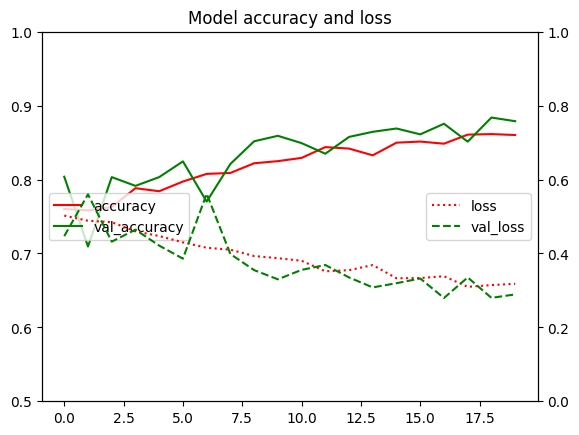

In [ ]:
def plotloss_acc(train_history,acclim,losslim):
  fig=plt.figure()
  ax1=fig.gca()
  ax1.set_title("Model accuracy and loss")
  ax1.plot(train_history.history['accuracy'],label="accuracy",c='r')
  ax1.plot(train_history.history['val_accuracy'],label="val_accuracy",c='g')
  ax1.set_ylim(acclim)
  ax2=ax1.twinx()
  ax2.plot(train_history.history['loss'],label="loss",c='r',ls=":")
  ax2.plot(train_history.history['val_loss'],label="val_loss",c='g',ls="--")
  ax2.set_ylim(losslim)
  ax1.legend(loc='center left')
  ax2.legend(loc='center right')
  plt.show()
plotloss_acc(hist,[0.5,1],[0,1])

In [ ]:
class_names=['cat','dog']
def combo_pred(model, filename, class_names, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[tf.argmax(pred[0])]
  print(pred)
  print(tf.argmax(pred[0]))
  img1 = img/255.
  plt.imshow(img1)
  plt.title("Prediction: %s @ %.4f"%(pred_class,pred[0][tf.argmax(pred[0])]))
  plt.axis(False);
  plt.show()
  return pred

In [ ]:
combo_pred(mymo,'/content/2.png',class_names)

1/1 [==============================] - 0s 73ms/step


IndexError: ignored

In [ ]:
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/catdog",
image_size=180,
shuffle_set=False)

y_probs = mymo.predict(train_dataset)
y_preds = y_probs.argmax(axis=1)
y_preds
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
y_train


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.

Class name list: ['cats', 'dogs']
251/251 [==============================] - 11s 45ms/step


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
confusion_matrix(y_true=y_train,
y_pred=y_preds)


In [ ]:
make_confusion_matrix(y_true=y_train,
y_pred=y_preds,
classes=class_list.class_names,
figsize=(6, 6),
text_size=14)


In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)
  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
    # Label the axes
    ax.set(title="Confusion Matrix",
    xlabel="Predicted label",
    ylabel="True label",
    xticks=np.arange(n_classes), # create enough axis slots for each class
    yticks=np.arange(n_classes),
    xticklabels=labels, # axes will labeled with class names (if they exist) or ints
    yticklabels=labels)
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=text_size)